# Simple Linear Regression Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('../height-weight.csv') 

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


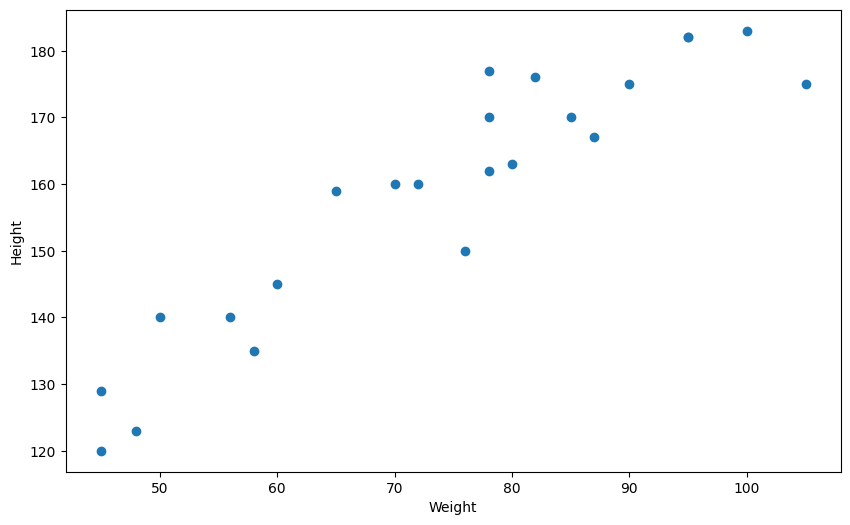

In [6]:
# Scatter plot of height and weight
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height');

## Split the data

In [7]:
# Create dependent and independent variables
X = df['Weight'].values.reshape(-1,1)
y = df['Height'].values

In [8]:
X

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]])

In [9]:
y

array([120, 135, 123, 145, 160, 162, 163, 175, 182, 170, 176, 182, 175,
       183, 170, 177, 140, 159, 150, 167, 129, 140, 160])

In [11]:
X.shape, y.shape

((23, 1), (23,))

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

## Standrize data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[:5]

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281]])

In [16]:
X_test[:5]

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

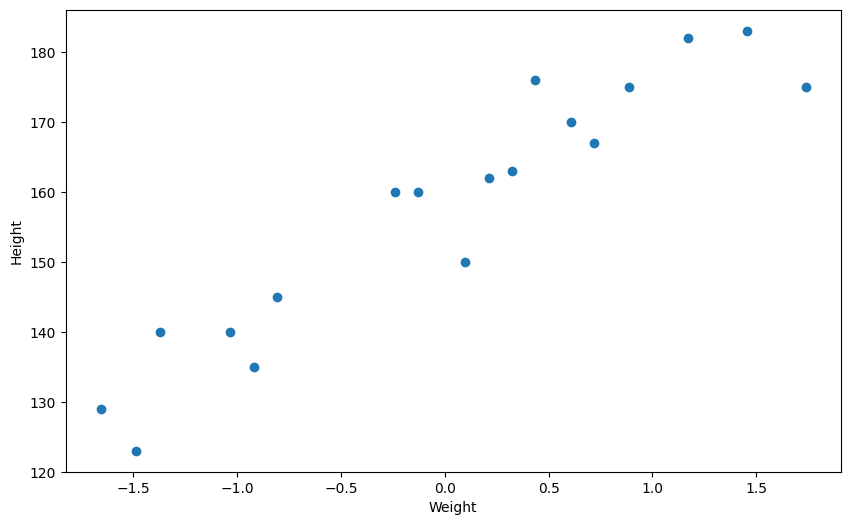

In [17]:
# Scatter plot standardized height and weight
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.xlabel('Weight')
plt.ylabel('Height');

In [18]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression(n_jobs=-1)

# Train the model
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [19]:
# Slope and intercept of the line
model.coef_, model.intercept_

(array([17.03440872]), np.float64(157.5))

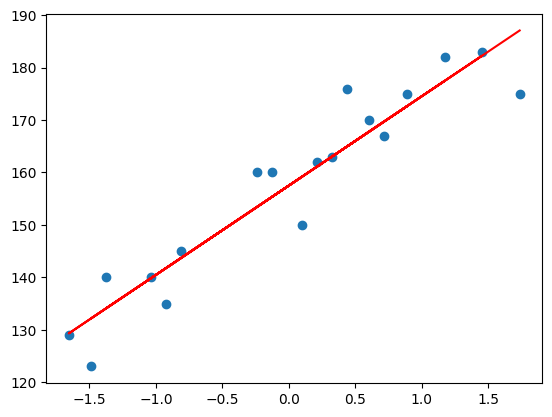

In [21]:
# Plot the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red');

In [22]:
# Predictions on the test set
y_pred = model.predict(X_test)

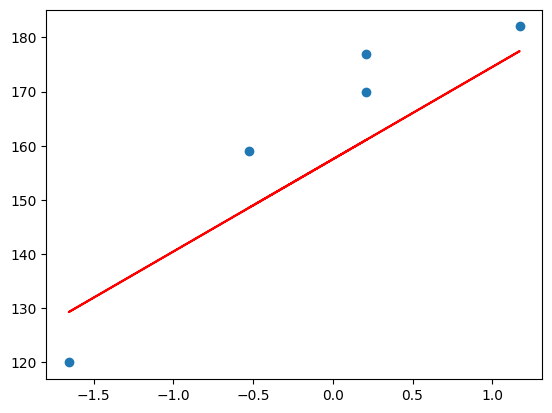

In [23]:
# Plot the predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red');

In [28]:
# Calculating Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, R2 Score and Adjusted R2 Score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')
print(f'Adjusted R2 Score: {adj_r2:.2f}')

Mean Squared Error: 109.78
Mean Absolute Error: 9.82
Root Mean Squared Error: 10.48
R2 Score: 0.78
Adjusted R2 Score: 0.70


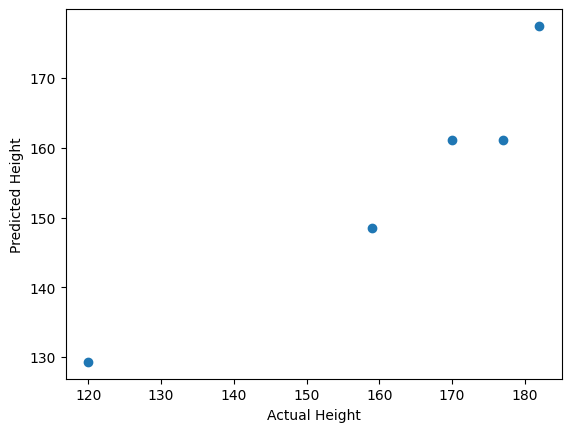

In [36]:
# Plot scatter plot for predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height');

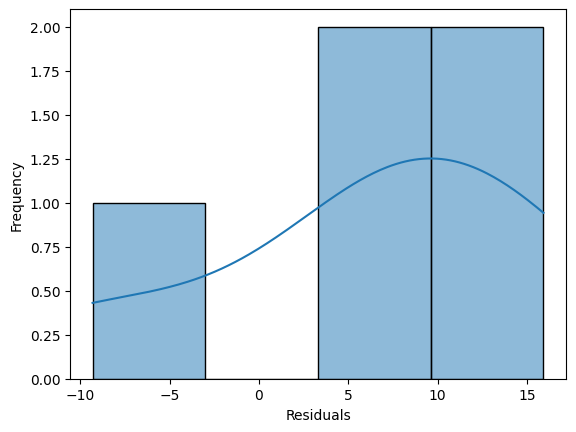

In [41]:
# Plot the residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency');

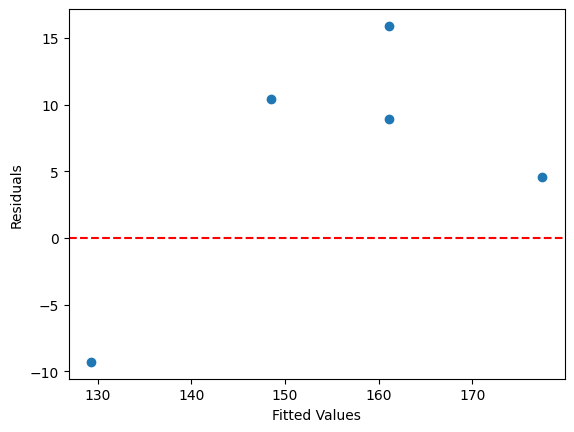

In [42]:
# Plot the residuals vs fitted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', ls='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

## Predictions for new data

In [35]:
# Predicting height for a given weight
weight = 80

# Standardize the weight and predict the height
height = model.predict(scaler.transform([[weight]]))[0]
print(f'Predicted height for a weight of {weight} kg is {height:.2f} cm')

Predicted height for a weight of 80 kg is 163.01 cm
